<h1 align=\"center\"><font color='green'><font size=\"6\">Feature Engineering</font> </h1>

<div style="background-color: #90EE90;">.</div>  </div>

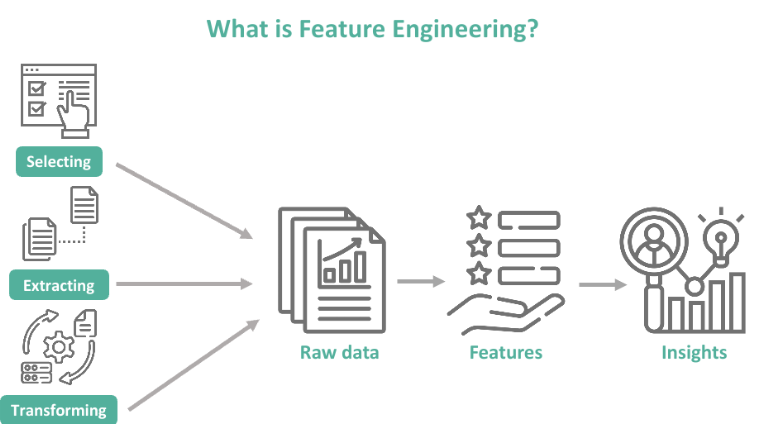

Feature engineering is the process of selecting, extracting and transforming raw data into features that are more predictive for a machine learning model. 


  It is a crucial step in the machine learning pipeline, as the quality of the features can significantly impact the model's performance. 

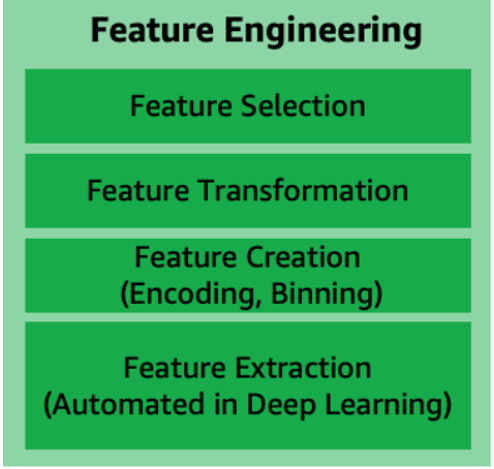

In [2]:
#Steps in Feature engineering

 <div class = "alert alert-block alert-success">
     <font size = "5">
 Feature Selection
  

Feature selection is the process of identifying and selecting the most relevant features for use in model construction. This helps improve model performance and reduce overfitting.

#### Importance of Feature Selection
 - Reduces dimensionality, which can improve model accuracy and efficiency.
 - Helps avoid overfitting by eliminating irrelevant features.
 - Improves interpretability of the model.
#### Techniques for Feature Selection
 - Filter Methods: Use statistical measures to score features.
     - Example: Correlation coefficients, Chi-square tests.
 - Wrapper Methods: Use a predictive model to assess the value of subsets of features.
      - Example: Recursive Feature Elimination (RFE).
 -  Embedded Methods: Perform feature selection during the model training process.
     - Example: Lasso regression, tree-based methods (e.g., Random Forest).

 <div class = "alert alert-block alert-success">
     <font size = "5">
 Feature Transformation 

Feature transformation involves modifying existing features to improve the performance of machine learning models.
#### Importance of Feature Transformation
 - Makes the data more suitable for the learning algorithm.
 - Helps in stabilizing variance and reducing skewness.
#### Techniques for Feature Transformation
 - Scaling: Adjusts the range of features.
    - Example: StandardScaler, MinMaxScaler.
  - Normalization: Rescales features to have a unit norm.
 - Log Transformation: Reduces skewness in data.



 <div class = "alert alert-block alert-success">
     <font size = "5">
 Feature Creation

Feature creation is the process of deriving new features from existing ones to enhance model performance.
#### Encoding
 Encoding transforms categorical variables into numerical formats that machine learning algorithms can interpret.

 - One-Hot Encoding: Converts categorical variables into a binary matrix.

 - Label Encoding: Assigns unique integer values to categories.

#### Binning
Binning transforms continuous variables into categorical ones, often improving model performance by reducing noise.

 - Equal-Width Binning: Divides the range of the variable into equal-width bins. eg: age-groups from 0-10, 11-20 etc

 - Equal-Frequency Binning: Divides the data into bins containing the same number of observations. eg: income ranges like low-income, middle-income, high_income

 <div class = "alert alert-block alert-success">
     <font size = "5">
 Feature Extraction

Feature extraction is the process of reducing the dimensionality of the data while retaining important information, particularly useful in deep learning.
#### Importance of Feature Extraction
 - Reduces computational costs and improves model performance.
 - Helps in capturing complex patterns in high-dimensional data.
#### Automated Feature Extraction in Deep Learning
Deep learning models, especially convolutional and recurrent networks, can automatically extract features from raw data:

 - Convolutional Neural Networks (CNNs): Automatically learn spatial hierarchies of features from images through convolutional layers.

 - Recurrent Neural Networks (RNNs): Capture sequential dependencies in time-series or text data.

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


In [6]:
#creating dataset for a mobile store
np.random.seed(42)
data_size = 1000
tenure = np.random.randint(1, 73, size=data_size)  
monthly_charges = np.random.uniform(20, 120, size=data_size)  
total_charges = tenure * monthly_charges + np.random.normal(0, 50, data_size)  
service_type = np.random.choice(['Basic', 'Standard', 'Premium'], size=data_size)
has_internet_service = np.random.choice(['Yes', 'No'], size=data_size)
reviews = np.random.choice(['Good Network','Easy to use','Not worth it', 'Excellent service'], size = data_size)
churn = np.random.choice(['Yes', 'No'], size=data_size, p=[0.25, 0.75])  # 25% churn rate


#Creating DataFrame
data = pd.DataFrame({
    'customer_id': np.arange(1, data_size + 1),
    'tenure': tenure,
    'monthly_charges': monthly_charges,
    'total_charges': total_charges,
    'service_type': service_type,
    'has_internet_service': has_internet_service,
    'reviews': reviews,
    'churn': churn
})

In [7]:
#Encoding Categorical Variables using one-hot encoding
data = pd.get_dummies(data, columns=['has_internet_service','churn'], drop_first=True)

In [8]:
#displaying first 5 rows
data.head()

,customer_id,tenure,monthly_charges,total_charges,service_type,reviews,has_internet_service_Yes,churn_Yes
0,1,52,106.699376,5581.368082,Standard,Not worth it,1,0
1,2,15,60.798450,983.739094,Standard,Not worth it,0,1
2,3,72,75.172260,5420.536186,Standard,Good Network,0,0
3,4,61,45.388856,2725.904912,Premium,Easy to use,1,0
4,5,21,39.611310,822.907011,Basic,Good Network,0,0


In [9]:
#Encoding Categorical Variables using Label encoding
le = LabelEncoder()
data['encoded_column'] = le.fit_transform(data['service_type'])  

In [10]:
data.head()

,customer_id,tenure,monthly_charges,total_charges,service_type,reviews,has_internet_service_Yes,churn_Yes,encoded_column
0,1,52,106.699376,5581.368082,Standard,Not worth it,1,0,2
1,2,15,60.798450,983.739094,Standard,Not worth it,0,1,2
2,3,72,75.172260,5420.536186,Standard,Good Network,0,0,2
3,4,61,45.388856,2725.904912,Premium,Easy to use,1,0,1
4,5,21,39.611310,822.907011,Basic,Good Network,0,0,0


In [12]:
#Initializing the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

 - TF-IDF Vectorizer is a text preprocessing technique used to convert text documents into numerical vectors that can be used as input for machine learning algorithms. It stands for Term Frequency-Inverse Document Frequency.
 - It assigns higher weights to words that are more distinctive and informative for a document.

In [13]:
#Fitting and transforming the text data(reviews) into TF-IDF features
text_features = vectorizer.fit_transform(reviews)

In [14]:
#Converting to array and display the first 5 features
text_features.toarray()
#This step is done because many machine learning algorithms require dense arrays as input.
#Dense arrays are easier to visualize and understand.
#Also Some operations might be more efficient or convenient on dense arrays.

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.57735027],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.57735027],
       [0.        , 0.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.70710678, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.57735027],
       [0.        , 0.70710678, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
#Calculating the correlation matrix
corr_matrix = data.corr()
corr_matrix

C:\Users\Nava Thapaliya\AppData\Local\Temp\ipykernel_15216\1560881347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,customer_id,tenure,monthly_charges,total_charges,has_internet_service_Yes,churn_Yes,encoded_column
customer_id,1.000000,-0.004385,-0.057263,-0.050816,-0.011390,0.006084,0.000062
tenure,-0.004385,1.000000,-0.070249,0.761106,0.027930,0.049524,-0.075290
monthly_charges,-0.057263,-0.070249,1.000000,0.506716,0.011224,0.001152,-0.016299
total_charges,-0.050816,0.761106,0.506716,1.000000,0.029605,0.038345,-0.058214
has_internet_service_Yes,-0.011390,0.027930,0.011224,0.029605,1.000000,0.009173,0.006030
churn_Yes,0.006084,0.049524,0.001152,0.038345,0.009173,1.000000,-0.032056
encoded_column,0.000062,-0.075290,-0.016299,-0.058214,0.006030,-0.032056,1.000000


<Axes: >

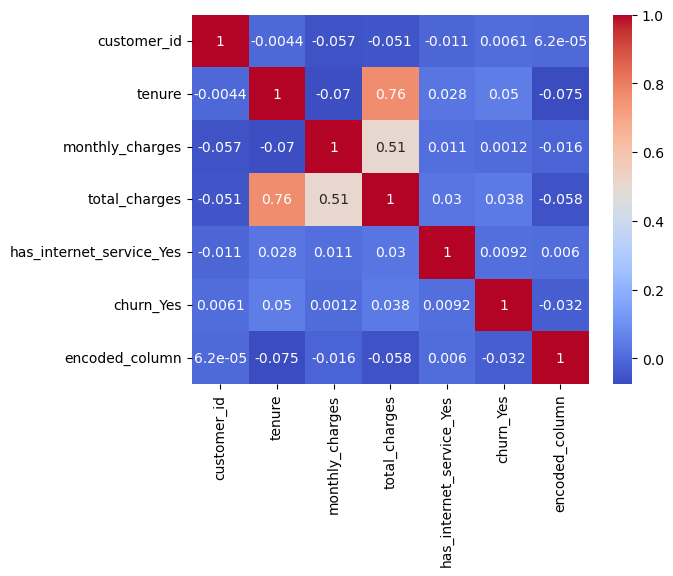

In [16]:
#Plotting the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#A correlation matrix shows how much different features are related to each other. 
#This helps you choose the best features for your machine learning model 
#and avoid problems like having too many similar features.

In [17]:
#importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [18]:
#Scaling columns to standardize them and improve performance
scaler = StandardScaler()
data[['tenure', 'monthly_charges', 'total_charges']] = scaler.fit_transform(data[['tenure', 'monthly_charges', 'total_charges']])


In [19]:
#creating new feature with existing feature
data['new_feature'] = data['tenure'] / data['monthly_charges']

In [20]:
#Applying a logarithmic transformation as it,
#Reduces skewness and makes the feature more normally distributed.
data['log_feature'] = data['total_charges'].apply(lambda x: np.log(x + 1))

In [34]:
#Assigning features and target variable
X = data[['tenure', 'monthly_charges', 'total_charges','encoded_column','new_feature']]
y = data['churn_Yes']


In [35]:
#creating a Linear Regression model
model = LinearRegression()

#Applying Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, y)

#RFE streamlines models by removing irrelevant features, improving accuracy and preventing overfitting.

In [36]:
#Displaying the ranking of features
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Selected Features:  [ True False False  True False]
Feature Ranking:  [1 3 2 1 4]


 - RFE ranks the features based on their importance to the model.
 - In this case, RFE selects the top 2 features(0:tenure,3:encoded_column) out of the 5 available (tenure, monthly_charges, total_charges,encoded_column,new_feature).

##### Overfitting
 Overfitting happens when a model learns the training data too well, including the noise and outliers. As a result, it performs great on the training data but poorly on new, unseen data.
 - Analogy: Imagine a student who memorizes answers for a test without understanding the material. They might ace that specific test but struggle with similar questions later.

##### Underfitting
  Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It fails to learn enough from the training data, leading to poor performance on both training and new data.
 - Analogy: Think of a student who skims through a textbook without grasping the concepts. They won’t do well on the test because they didn’t learn the material thoroughly.

#### Summary
Overfitting = Too complex; learns too much from the training data, struggles with new data.

Underfitting = Too simple; doesn’t learn enough from the training data, performs poorly overall.